# monocyte

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
monocyte = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/monocyte.rds')

In [4]:
Idents(monocyte) = monocyte$minor
degs = FindAllMarkers(monocyte,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster others

Calculating cluster CD16Mono

Calculating cluster CD14Mono_2

Calculating cluster CD14Mono_1



In [5]:
top_genes(degs)

others



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster     gene
1  1.710314e-20   3.202959 0.151 0.007 3.256267e-16  others    CCL17
2  3.080333e-17   2.580159 0.462 0.157 5.864646e-13  others      LTB
3  1.279292e-06   2.111309 0.623 0.669 2.435644e-02  others HLA-DPB1
4  4.309652e-26   1.952961 0.830 0.512 8.205146e-22  others     PPA1
5  5.849266e-18   1.911158 0.321 0.068 1.113642e-13  others    S100B
6  4.106830e-40   1.873825 0.481 0.067 7.818993e-36  others     PKIB
7  5.610698e-06   1.841546 0.575 0.567 1.068221e-01  others HLA-DQB1
8  5.730469e-35   1.744130 0.434 0.058 1.091024e-30  others     CST7
9  4.147039e-08   1.741501 0.575 0.450 7.895548e-04  others HLA-DQA1
10 4.772844e-38   1.680012 0.415 0.049 9.087018e-34  others     CD1C
11 3.402718e-06   1.672747 0.623 0.683 6.478435e-02  others HLA-DPA1
12 3.307886e-10   1.640589 0.226 0.061 6.297884e-06  others     IDO1
13 3.271775e-23   1.582246 0.811 0.498 6.229132e-19  others      GSN
14 2.248978e-12   1.566899 0.632 0

CD16Mono



          p_val avg_log2FC pct.1 pct.2    p_val_adj  cluster     gene
1  4.895257e-25  2.2054387 0.326 0.071 9.320080e-21 CD16Mono      FN1
2  1.050340e-17  2.0900139 0.399 0.172 1.999743e-13 CD16Mono     SPP1
3  1.561567e-14  1.9572347 0.297 0.108 2.973067e-10 CD16Mono     C1QA
4  4.462888e-10  1.6863931 0.231 0.090 8.496893e-06 CD16Mono     C1QB
5  9.056225e-62  1.6861546 0.788 0.275 1.724215e-57 CD16Mono   FCGR3A
6  4.656851e-09  1.5547879 0.260 0.121 8.866180e-05 CD16Mono     APOE
7  1.847228e-11  1.4557799 0.236 0.084 3.516937e-07 CD16Mono    APOC1
8  8.081716e-17  1.4466268 0.255 0.065 1.538678e-12 CD16Mono     C1QC
9  1.083445e-20  1.3652339 0.484 0.207 2.062770e-16 CD16Mono     RGS1
10 4.400293e-17  1.3290632 0.367 0.135 8.377719e-13 CD16Mono     CCL2
11 3.426768e-52  1.2349955 0.749 0.269 6.524223e-48 CD16Mono     FPR3
12 1.821212e-23  1.2135680 0.487 0.187 3.467405e-19 CD16Mono     MRC1
13 6.408853e-09  1.2037015 0.200 0.073 1.220181e-04 CD16Mono   CXCL10
14 6.051295e-47  1.1

CD14Mono_2



          p_val avg_log2FC pct.1 pct.2    p_val_adj    cluster       gene
1  1.850728e-28  1.8116689 0.798 0.395 3.523601e-24 CD14Mono_2     RIPOR2
2  5.540072e-27  1.6353063 0.851 0.505 1.054774e-22 CD14Mono_2       LYST
3  3.414861e-17  1.3957293 0.825 0.572 6.501554e-13 CD14Mono_2      CSF3R
4  1.260875e-22  1.3841857 0.737 0.370 2.400581e-18 CD14Mono_2    CLEC12A
5  9.770606e-17  1.3680653 0.702 0.404 1.860226e-12 CD14Mono_2      MEGF9
6  1.638005e-24  1.3577435 0.877 0.573 3.118597e-20 CD14Mono_2      SMAP2
7  1.680939e-22  1.3458333 0.754 0.367 3.200339e-18 CD14Mono_2      LRRK2
8  4.495847e-21  1.2858762 0.886 0.614 8.559644e-17 CD14Mono_2       SSH2
9  3.103338e-12  1.2770390 0.605 0.326 5.908444e-08 CD14Mono_2      PLCB1
10 6.155036e-28  1.2713065 0.667 0.238 1.171857e-23 CD14Mono_2   RAP1GAP2
11 1.578906e-17  1.2549936 0.728 0.444 3.006079e-13 CD14Mono_2      NCOA2
12 6.192801e-20  1.2171459 0.842 0.594 1.179047e-15 CD14Mono_2      DLEU2
13 7.702657e-21  1.2142987 0.658 0.281

CD14Mono_1



          p_val avg_log2FC pct.1 pct.2    p_val_adj    cluster      gene
1  5.479365e-37   2.742328 0.352 0.048 1.043216e-32 CD14Mono_1     CCL20
2  8.305335e-71   2.632699 0.829 0.311 1.581253e-66 CD14Mono_1     CXCL8
3  3.336733e-63   2.571181 0.683 0.168 6.352805e-59 CD14Mono_1      EREG
4  1.195545e-71   2.538295 0.921 0.596 2.276198e-67 CD14Mono_1     NFKB1
5  1.294024e-78   2.474205 0.933 0.548 2.463693e-74 CD14Mono_1    ATP2B1
6  5.626335e-53   2.374422 0.876 0.580 1.071198e-48 CD14Mono_1     NFAT5
7  7.252507e-63   2.372017 0.933 0.599 1.380805e-58 CD14Mono_1    JARID2
8  6.775628e-57   2.268111 0.819 0.398 1.290012e-52 CD14Mono_1    MAP4K4
9  5.790790e-64   2.257372 0.616 0.111 1.102508e-59 CD14Mono_1     CXCL2
10 4.587326e-56   2.215274 0.898 0.490 8.733810e-52 CD14Mono_1      IL1B
11 1.747369e-60   2.135342 0.790 0.265 3.326815e-56 CD14Mono_1      G0S2
12 1.037880e-63   2.112097 0.908 0.566 1.976019e-59 CD14Mono_1   ATP13A3
13 3.725777e-62   2.072072 0.949 0.688 7.093508e-58

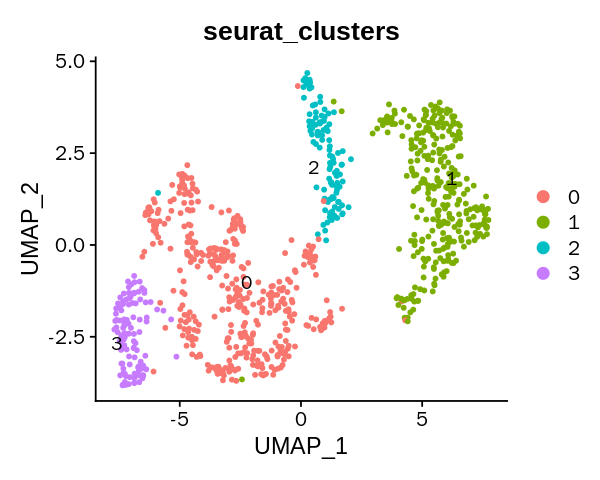

In [6]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(monocyte, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

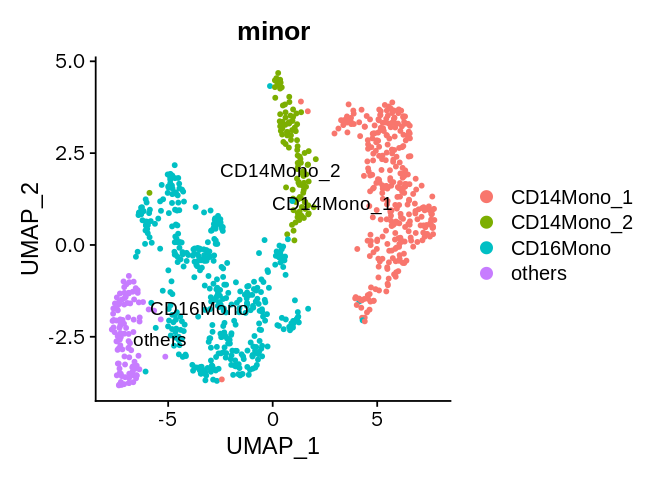

In [7]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(monocyte, group.by = 'minor', label = TRUE,repel = TRUE)

In [8]:
unique(monocyte$minor)

[1] "others"     "CD16Mono"   "CD14Mono_2" "CD14Mono_1"

In [15]:
monocyte$curated = monocyte$minor
monocyte$curated[monocyte$curated == 'CD16Mono'] = 'Mono_FCGR3A'
monocyte$curated[monocyte$curated %in% c('CD14Mono_1','CD14Mono_2')] = 'Mono_CD14'

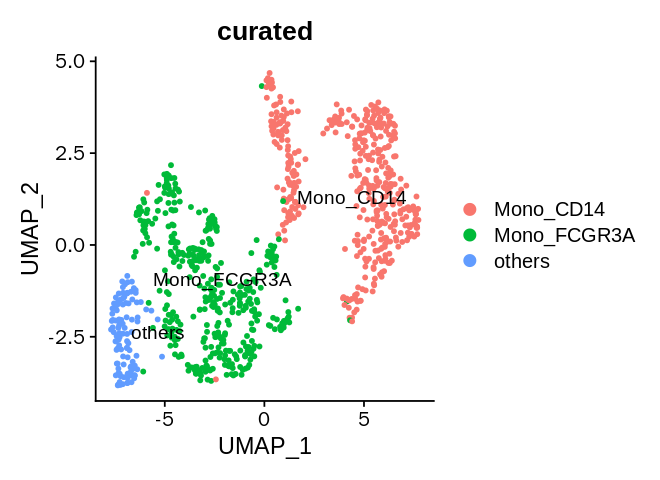

In [16]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(monocyte, group.by = 'curated', label = TRUE,repel = TRUE)

In [17]:
saveRDS(monocyte,file = '~/HPV/res/public_rna/seurat_rds/annotated/monocyte.rds')